<a href="https://colab.research.google.com/github/venkisamarth/Data/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('Boston1.csv')

In [ ]:
data


crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [ ]:
data.shape

(506, 14)

In [ ]:
data.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [ ]:
data.tail()

crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   

      black  lstat  medv  
501  391.99   9.67  22.4  
502  396.90   9.08  20.6  
503  396.90   5.64  23.9  
504  393.45   6.48  22.0  
505  396.90   7.88  11.9

In [ ]:
data.describe().T

count        mean         std        min         25%        50%  \
crim     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
zn       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
indus    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
chas     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
nox      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
rm       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
age      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
dis      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
rad      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
tax      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
ptratio  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
black    506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
lstat    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
medv     506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
crim       3.677083   88.9762  
zn        12.500000  100.0000  
indus     18.100000   27.7400  
chas       0.000000    1.0000  
nox        0.624000    0.8710  
rm         6.623500    8.7800  
age       94.075000  100.0000  
dis        5.188425   12.1265  
rad       24.000000   24.0000  
tax      666.000000  711.0000  
ptratio   20.200000   22.0000  
black    396.225000  396.9000  
lstat     16.955000   37.9700  
medv      25.000000   50.0000

In [ ]:
#let us take out the dependent and independent varible from dataset

In [ ]:
data_=data.loc[:,['lstat','medv']]
data_.head(5
          )

lstat  medv
0   4.98  24.0
1   9.14  21.6
2   4.03  34.7
3   2.94  33.4
4   5.33  36.2

In [ ]:
data_

lstat  medv
0     4.98  24.0
1     9.14  21.6
2     4.03  34.7
3     2.94  33.4
4     5.33  36.2
..     ...   ...
501   9.67  22.4
502   9.08  20.6
503   5.64  23.9
504   6.48  22.0
505   7.88  11.9

[506 rows x 2 columns]

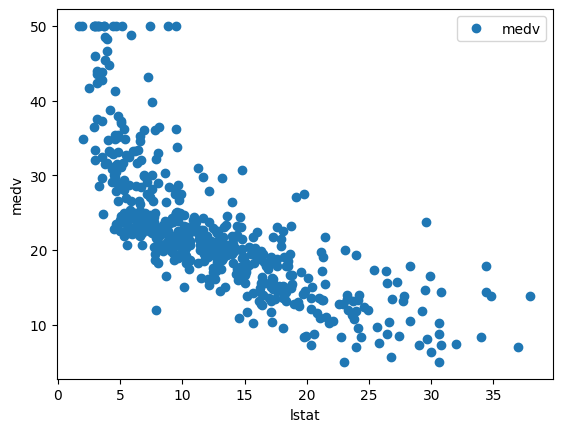

In [ ]:
# visualizing varibles

from pandas.io.formats import style
import matplotlib.pyplot as plt
data.plot(x='lstat',y='medv',style='o')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()
    


In [ ]:
#preparing data
x=pd.DataFrame(data['lstat'])
y=pd.DataFrame(data['medv'])

In [ ]:
x.size,y.size

(506, 506)

In [ ]:
x.head(5)

lstat
0   4.98
1   9.14
2   4.03
3   2.94
4   5.33

In [ ]:
y.head(5)

medv
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2

In [ ]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

[34.33497839]
[[-0.92441715]]


In [ ]:
y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred,columns=['predicted'])
x_test.head(3)

lstat
307   7.53
343   7.18
47   18.80

In [ ]:
y_pred

predicted
0    27.374117
1    27.697663
2    16.955936
3    26.847199
4    24.915168
..         ...
97   26.791734
98   30.507891
99   22.317555
100  19.830873
101  16.909715

[102 rows x 1 columns]

In [ ]:
y_test

medv
307  28.2
343  23.9
47   16.6
67   22.0
362  20.8
..    ...
92   22.9
224  44.8
110  21.7
426  10.2
443  15.4

[102 rows x 1 columns]

In [ ]:
from sklearn import metrics
import numpy as np
print('Mean absoulte Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squard Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root  Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absoulte Error: 5.078127727696937
Mean squard Error: 46.994820919547124
Root  Mean Squared Error: 6.855276866731724


Multiple Linear Regression

In [80]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('https://raw.githubusercontent.com/akjadon/Data/master/data/Boston1.csv')
dataset


crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [81]:
X = pd.DataFrame(dataset.iloc[:,:-1])
y = pd.DataFrame(dataset.iloc[:,-1])


In [78]:
x=pd.DataFrame(data_set.iloc[::-1])
y=pd.DataFrame(data_set.iloc[:-1])


In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [84]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [54]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [119]:

v = pd.DataFrame(regressor.coef_,index=['Co-efficient']).transpose()
w = pd.DataFrame(X.columns, columns=['Attribute'])

In [121]:

pd.DataFrame(regressor.coef_,index=['Co-efficient'])

0
Co-efficient -0.924417

In [122]:
v

Co-efficient
0     -0.924417

In [123]:
w



Attribute
0       crim
1         zn
2      indus
3       chas
4        nox
5         rm
6        age
7        dis
8        rad
9        tax
10   ptratio
11     black
12     lstat

In [124]:
coeff_df = pd.concat([w,v], axis=1, join='inner')
coeff_df

Attribute  Co-efficient
0      crim     -0.924417

In [125]:
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred

Predicted
0    27.374117
1    27.697663
2    16.955936
3    26.847199
4    24.915168
..         ...
97   26.791734
98   30.507891
99   22.317555
100  19.830873
101  16.909715

[102 rows x 1 columns]

In [126]:
x_test

lstat
307   7.53
343   7.18
47   18.80
67    8.10
362  10.19
..     ...
92    8.16
224   4.14
110  13.00
426  15.69
443  18.85

[102 rows x 1 columns]

In [127]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.69303133952063
Mean Squared Error: 129.26946324392242
Root Mean Squared Error: 11.36967296116834
